In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn  import preprocessing
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression as lr
from scipy import stats


In [176]:
df = pd.read_csv(r'C:\BeCode\LocalRepos\documents\real_estate_data_25to29.csv')

In [177]:
df.head(10)

,ID,Type,Sub type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchekType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,4.0,NaN,NaN,NaN,True,NaN,True,589.0,NaN,NaN
5,10128193,HOUSE,HOUSE,1295000.0,650.0,5.0,Antwerp,Berlaar,Flanders,2590,...,3.0,NaN,NON_FLOOD_ZONE,GAS,True,NaN,NaN,NaN,INSTALLED,NaN
6,10128195,HOUSE,HOUSE,442000.0,221.0,4.0,Antwerp,Merksplas,Flanders,2330,...,4.0,NaN,NaN,ELECTRIC,NaN,NaN,NaN,NaN,NaN,NaN
7,10128196,HOUSE,MIXED_USE_BUILDING,590000.0,1100.0,3.0,Liège,Liege,Wallonie,4020,...,3.0,NaN,NaN,GAS,True,NaN,NaN,NaN,HYPER_EQUIPPED,18.0
8,10128197,APARTMENT,APARTMENT,249000.0,145.0,2.0,Liège,Flemalle,Wallonie,4400,...,3.0,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
9,10128198,APARTMENT,PENTHOUSE,249000.0,135.0,2.0,Liège,Flemalle,Wallonie,4400,...,3.0,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


Then number of rows and columns

In [178]:
print(df.shape)

(21047, 35)


In [179]:
df.describe()

,ID,Price,NetHabitableSurface(msq),BedroomCount,Floor,SchoolDistance,ShopDistance,TransportDistance,NetHabitableSurface,TotalRoomCount,ConstructionYear,FacadeCount,HasBalcony,GardenArea,LivingRoomArea
count,2.104700e+04,1.943400e+04,18086.000000,20571.000000,6544.000000,16608.000000,16608.000000,16608.000000,18086.000000,1355.000000,11796.000000,13618.000000,0.0,4041.000000,6542.000000
mean,1.014885e+07,3.966239e+05,160.455103,2.990229,3.009169,110.087006,97.217124,27.124819,160.455103,6.740221,1984.584012,2.780291,NaN,607.726800,14.570009
std,1.154186e+04,4.034658e+05,222.093157,13.456484,17.840084,369.944464,572.958539,122.046176,222.093157,4.171947,111.486192,0.860917,NaN,2896.863416,40.806421
min,1.012819e+07,1.385000e+03,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1753.000000,1.000000,NaN,1.000000,1.000000
25%,1.013902e+07,2.300000e+05,93.000000,2.000000,1.000000,0.000000,0.000000,0.000000,93.000000,4.000000,1961.000000,2.000000,NaN,60.000000,9.000000
50%,1.014958e+07,3.150000e+05,130.000000,3.000000,2.000000,0.000000,0.000000,0.000000,130.000000,6.000000,1989.000000,3.000000,NaN,150.000000,12.000000
75%,1.015735e+07,4.450000e+05,186.000000,3.000000,3.000000,0.000000,0.000000,0.000000,186.000000,8.000000,2021.000000,4.000000,NaN,461.000000,16.000000
max,1.016892e+07,2.965000e+07,17842.000000,1919.000000,999.000000,9000.000000,15000.000000,3700.000000,17842.000000,40.000000,9999.000000,8.000000,NaN,87000.000000,2153.000000


In [180]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21047 entries, 0 to 21046
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        21047 non-null  int64  
 1   Type                      21047 non-null  object 
 2   Sub type                  21047 non-null  object 
 3   Price                     19434 non-null  float64
 4   NetHabitableSurface(msq)  18086 non-null  float64
 5   BedroomCount              20571 non-null  float64
 6   Province                  20264 non-null  object 
 7   locality                  21047 non-null  object 
 8   Region                    20264 non-null  object 
 9   PostCode                  21047 non-null  object 
 10  street                    16513 non-null  object 
 11  Floor                     6544 non-null   float64
 12  RegionCode                20264 non-null  object 
 13  IsIsolated                6131 non-null   object 
 14  HasSea

counting the null values for each column

In [181]:
df.isna().sum()

ID                              0
Type                            0
Sub type                        0
Price                        1613
NetHabitableSurface(msq)     2961
BedroomCount                  476
Province                      783
locality                        0
Region                        783
PostCode                        0
street                       4534
Floor                       14503
RegionCode                    783
IsIsolated                  14916
HasSeaView                  21034
SchoolDistance               4439
ShopDistance                 4439
TransportDistance            4439
NetHabitableSurface          2961
TotalRoomCount              19692
HasAttic                    18348
HasBasement                 12736
HasDiningRoom               17630
BuildingCondition            7041
ConstructionYear             9251
FacadeCount                  7429
HasLift                     15663
FloodZoneType                9929
HeatingType                  8045
IsDoubleGlaze 

Removing all rows with no price value

In [182]:
df = df[df['Price'].notna()]
df.shape

(19434, 35)

which rows have full information?

In [183]:

selected_rows = df[~df.isnull().any(axis=1)]
selected_rows.shape

(0, 35)

How many percent of each column value has nan 

In [184]:
nan_percentage = df.isnull().sum() * 100 / len(df)
nan_percentage

ID                            0.000000
Type                          0.000000
Sub type                      0.000000
Price                         0.000000
NetHabitableSurface(msq)     14.428321
BedroomCount                  2.186889
Province                      4.029021
locality                      0.000000
Region                        4.029021
PostCode                      0.000000
street                       21.333745
Floor                        71.107338
RegionCode                    4.029021
IsIsolated                   69.939282
HasSeaView                   99.938253
SchoolDistance               20.870639
ShopDistance                 20.870639
TransportDistance            20.870639
NetHabitableSurface          14.428321
TotalRoomCount               93.053412
HasAttic                     86.430997
HasBasement                  60.239786
HasDiningRoom                83.142945
BuildingCondition            32.818771
ConstructionYear             43.480498
FacadeCount              

Since house doesn't expect to have properties of having lift, let us see the ratio of apartments having lift and those who do not have lift

In [185]:
print((df[(df['Type'] == "APARTMENT")].shape[0]))
print((df[(df['Type'] == "APARTMENT") & (df['HasLift'].isnull())]).shape[0])


7875
3402


Missing value for HasLift is therefor less than 50%

Columns to remove

ID -> no use at all
NetHabitableSurface -> duplicate information NetHabitableSurface(msq)
RegionCode -> will be redundant information with region name, province and post code


School, transport and shop distance -> most of the values are 0 which doesn't seem true and a lot of nan values

Remove columns which have more than 60% nan values, they will not provide enough information for decision. But will keep HasGarden column as it 
has impact on the price and the missing information probably be due to the property doesn't have garden. 

HasLift not applicable for houses and for apartments the missing value is less than 50% so it should not be removed



In [186]:
df = df.drop(['ID','Sub type','Floor', 'IsIsolated', 'SchoolDistance', 'ShopDistance', 'TransportDistance', 'HasSeaView', 'RegionCode', 'TotalRoomCount', 'HasBalcony', 'GardenArea', 'HasAttic', 'HasDiningRoom', 'LivingRoomArea', 'NetHabitableSurface', 'street'], axis=1)

In [188]:
df = df.drop(['Province', 'locality', 'BedroomCount', 'PostCode'], axis=1)

In [189]:
df.columns


Index(['Type', 'Price', 'NetHabitableSurface(msq)', 'Region', 'HasBasement',
       'BuildingCondition', 'ConstructionYear', 'FacadeCount', 'HasLift',
       'FloodZoneType', 'HeatingType', 'IsDoubleGlaze', 'HasGarden',
       'KitchekType'],
      dtype='object')

In [190]:
df.shape

(19434, 14)

Remove rows 

In [192]:
#remove rows where value of column NetHabitableSurface(17% missing) and BedroomCount(2%)is nan in order to avoid the bias from mean media or mode insertion
#Remove rows with nan values in column province and region -> post code in that row also fault which can not be extracted from lookup table

df = df.dropna(subset=['NetHabitableSurface(msq)','Region'])
#df = df.dropna(subset=['NetHabitableSurface(msq)', 'BedroomCount', 'Province', 'Region'])
#remaining data
df.shape

(15873, 14)

In [193]:
df = df.drop_duplicates(keep='first')
df.shape

(13729, 14)

Replacing nan values

Catagorical data -> new value(unknown), most frequenct value, using ml predicting model to find the missing value
continous values -> mean, mode, median or using pridicting model

In [194]:

df.fillna({'KitchekType':'Unknown','BuildingCondition':'Unknown' },inplace=True)

Create a column building age from the construction year to get numberic feature and remove column constructionyear. And fill missing value of age by mean value of the column.

In [195]:
df['BuildingAge'] = 2022 - df['ConstructionYear'] 
df = df.drop('ConstructionYear', axis=1)
mean_buildingAge = round(df['BuildingAge'].mean())
df.fillna({'BuildingAge':mean_buildingAge},inplace=True)
print(mean_buildingAge)


41


In [196]:
df.fillna({'HasLift':False, 'HasGarden': False, 'HasBasement': False, 'IsDoubleGlaze': False},inplace=True)

In [197]:
#heating type will be replaced by most frequent value
mode_heatingType = df['HeatingType'].mode()[0]  #common to the community
mode_facadeCount = df['FacadeCount'].mode()[0] # common trend
mode_floodzone = df['FloodZoneType'].mode()[0] 

In [198]:
df.fillna({'HeatingType':mode_heatingType, 'FacadeCount':mode_facadeCount, 'FloodZoneType': mode_floodzone}, inplace=True)

Analysis

C:\Users\genet\AppData\Local\Temp\ipykernel_11376\482035671.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.loc[:, df.columns!='BuildingAge'].corr(method='spearman')


Text(0.5, 1.0, 'Correlation between variables')

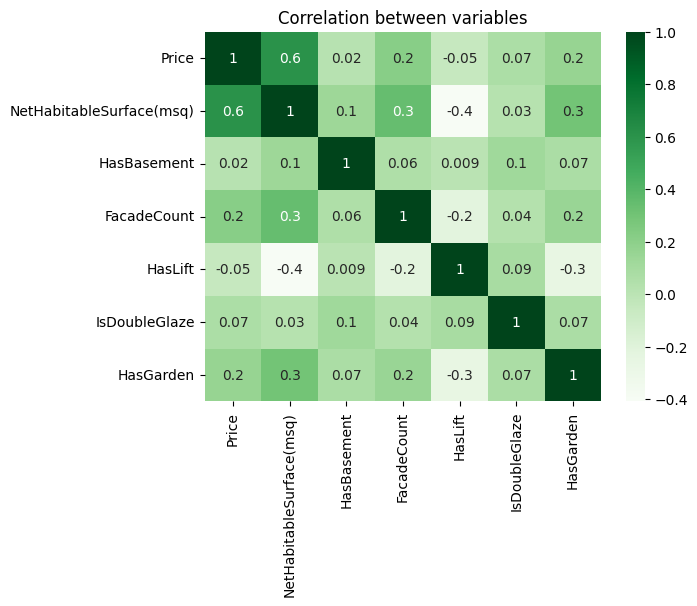

In [199]:
# corr.style.background_gradient(cmap='coolwarm')
corr = df.loc[:, df.columns!='BuildingAge'].corr(method='spearman')
heatmap = sns.heatmap(corr, annot=True, cmap="Greens", fmt='.1g')
plt.title("Correlation between variables")

Detecting and dealing with outliers

In [200]:
df.shape

(13729, 14)

In [202]:

def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [204]:

col_names_toremove_outliers = ['Price', 'NetHabitableSurface(msq)',	'FacadeCount',	'BuildingAge']
df_out=df
for col in col_names_toremove_outliers:
    df_out=  remove_outliers(df_out, col)




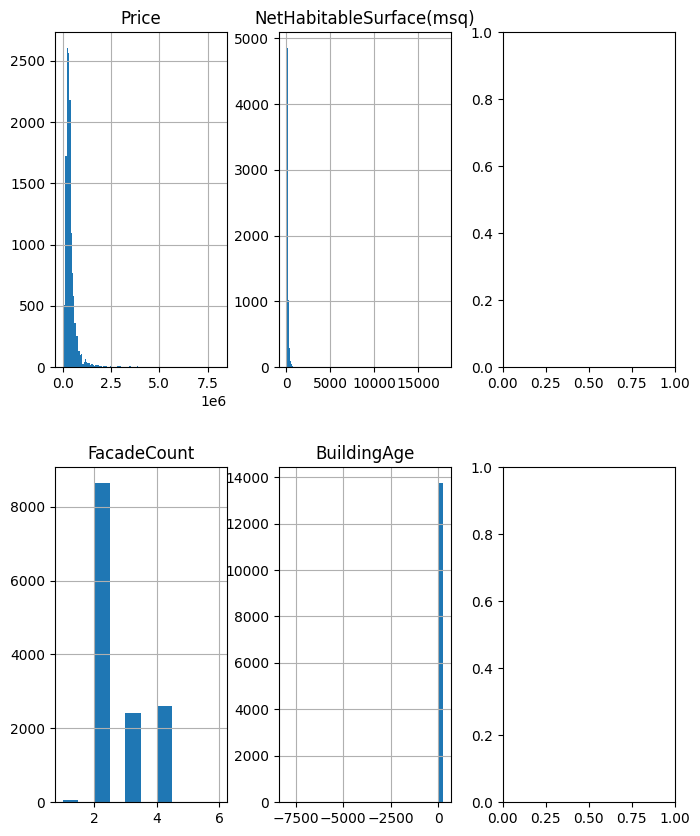

In [206]:
fig, axs = plt.subplots(2,3,figsize=(8,10))


df.hist(column='Price', ax= axs[0][0], bins=120)
df.hist(column='NetHabitableSurface(msq)', ax= axs[0][1], bins=330)
df.hist(column='FacadeCount', ax= axs[1][0])
df.hist(column='BuildingAge', ax= axs[1][1], bins=30)

plt.show()

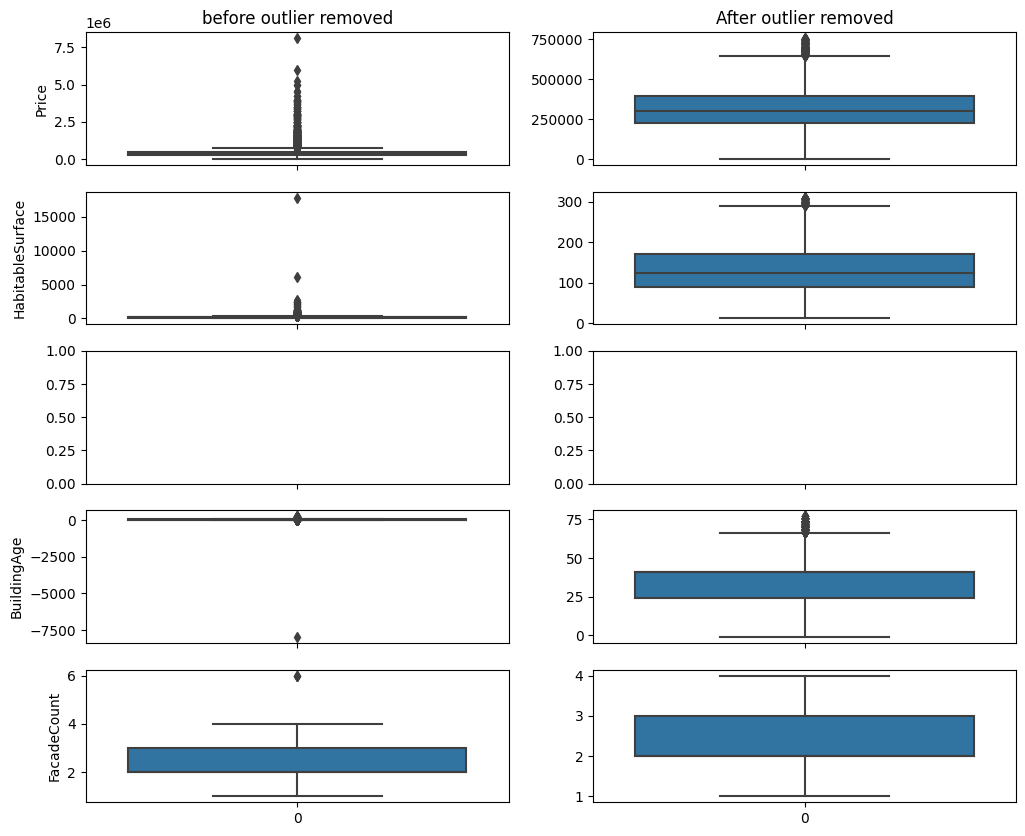

In [207]:
#['Price', 'NetHabitableSurface(msq)',	'BedroomCount',	'FacadeCount',	'BuildingAge']
from matplotlib.pyplot import xlabel


fig, axs = plt.subplots(5,2,figsize=(12,10), sharex=True)

ax1=  sns.boxplot(df['Price'], ax=axs[0][0])
ax1.set_title('before outlier removed')
ax1.set(ylabel='Price')
ax2=  sns.boxplot(df_out['Price'], ax=axs[0][1])
ax2.set_title('After outlier removed')

ax3=  sns.boxplot(df['NetHabitableSurface(msq)'], ax=axs[1][0])
ax4=  sns.boxplot(df_out['NetHabitableSurface(msq)'], ax=axs[1][1])
ax3.set(ylabel='HabitableSurface')

# ax5=  sns.boxplot(df['BedroomCount'], ax=axs[2][0])
# ax6=  sns.boxplot(df_out['BedroomCount'], ax=axs[2][1])
# ax5.set(ylabel='BedroomCount')

ax7=  sns.boxplot(df['BuildingAge'], ax=axs[3][0])
ax8=  sns.boxplot(df_out['BuildingAge'], ax=axs[3][1])
ax7.set(ylabel='BuildingAge')

ax9=  sns.boxplot(df['FacadeCount'], ax=axs[4][0])
ax10=  sns.boxplot(df_out['FacadeCount'], ax=axs[4][1])
ax9.set(ylabel='FacadeCount')

# df.plot.box(sym="r+")

plt.show()


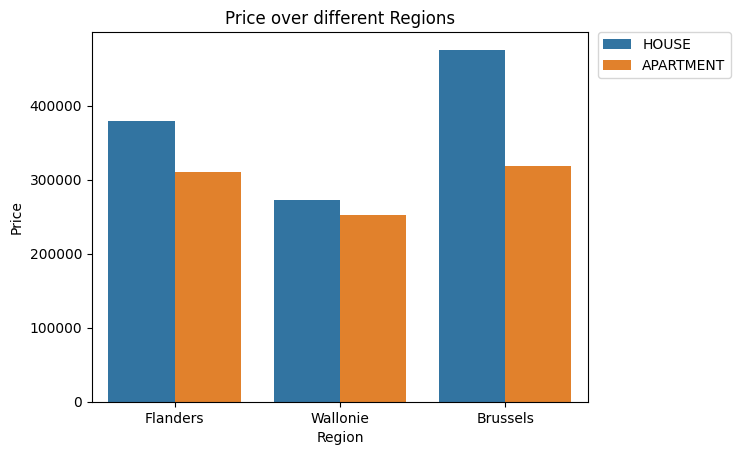

In [208]:
sns.barplot(data=df_out, x="Region", y="Price", hue='Type', errorbar=None)
plt.title('Price over different Regions')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [209]:
color_pal = ['#1b9e77', '#d95f02']

C:\Users\genet\AppData\Local\Temp\ipykernel_11376\4163167664.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '200k','400k', '600k', '800k', '1000k'])


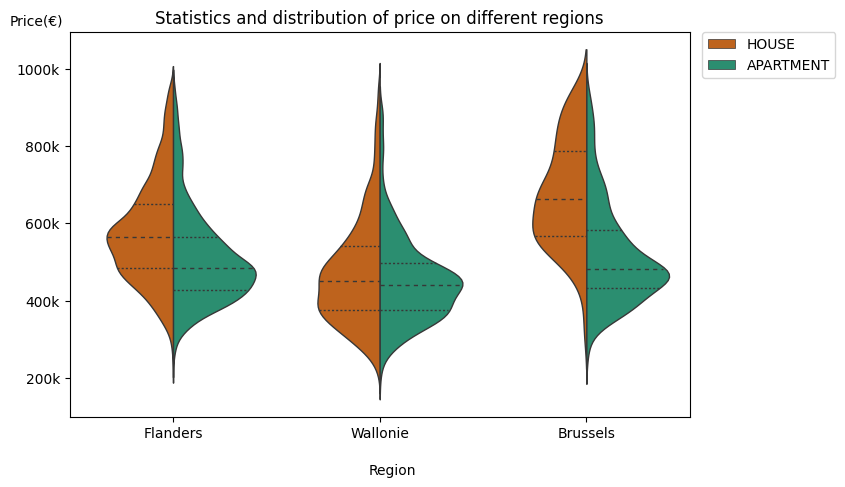

In [210]:
from tkinter import font


fig, ax = plt.subplots(figsize=(8,5))
sns.violinplot(data=df_out, x="Region", y="Price", hue='Type', split=True, inner="quart", linewidth=1, palette=color_pal[::-1])
ax.set_ylabel("Price("+"\u20AC)", loc="top", rotation="horizontal")
ax.set_yticklabels(['0', '200k','400k', '600k', '800k', '1000k'])
ax.set_xlabel("Region")
ax.yaxis.set_label_coords(-.01, 1.01)
ax.xaxis.set_label_coords(.52, -.12)
plt.title('Statistics and distribution of price on different regions')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', borderaxespad=0)
#plt.ylabel("Price("+"\u20AC)", rotation=0)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


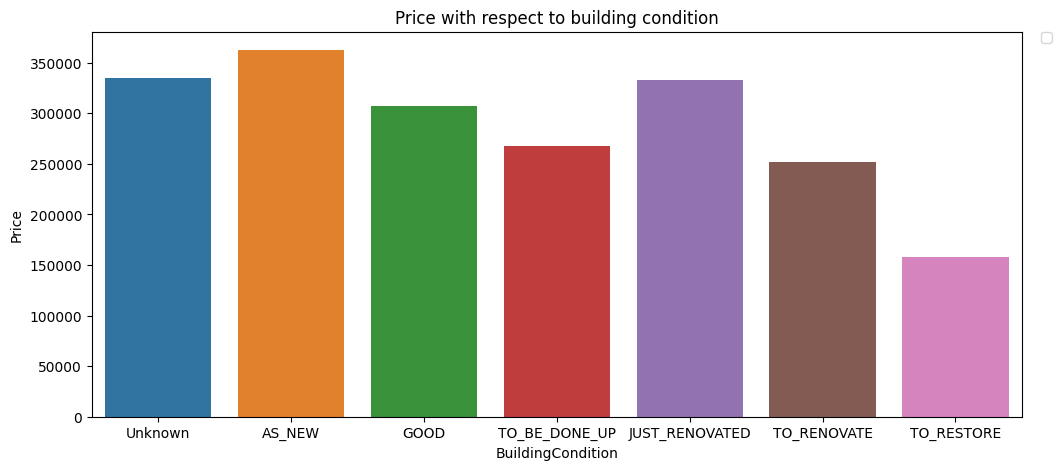

In [73]:

plt.figure(figsize=(12,5))
sns.barplot(data=df_out, x="BuildingCondition", y="Price", errorbar=None)
plt.title('Price with respect to building condition')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

C:\Users\genet\AppData\Local\Temp\ipykernel_11376\152760008.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['0', '', '200k', '', '400k', '', '600k', '', '800k','', '1000k'])


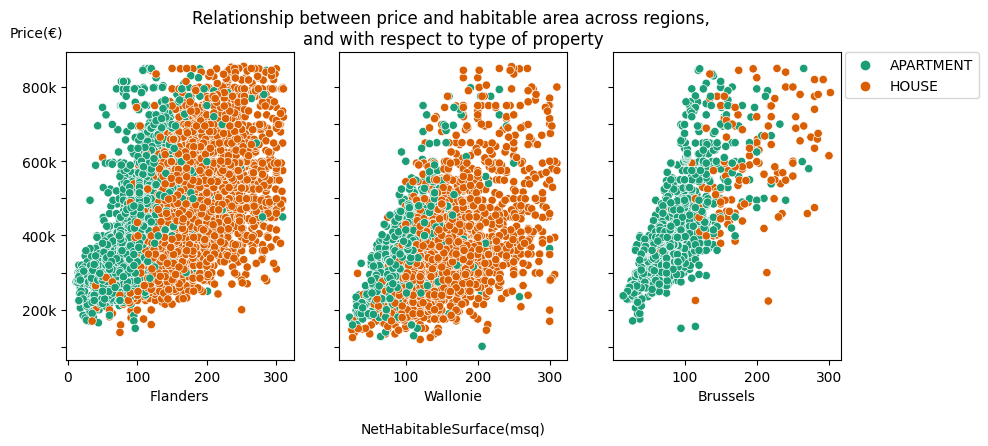

In [212]:
fig, ax = plt.subplots(1,3,figsize = (10,4), sharey=True)
hue_order=['APARTMENT', 'HOUSE']
sns.scatterplot(data=df_out[df_out['Region']=='Flanders'], x="NetHabitableSurface(msq)", y="Price", hue='Type', hue_order=hue_order, ax=ax[0], palette=color_pal[::])
sns.scatterplot(data=df_out[df_out['Region']=='Wallonie'], x="NetHabitableSurface(msq)", y="Price", hue='Type',hue_order=hue_order, ax=ax[1], palette=color_pal[::])
sns.scatterplot(data=df_out[df_out['Region']=='Brussels'], x="NetHabitableSurface(msq)", y="Price", hue='Type',hue_order=hue_order, ax=ax[2], palette=color_pal[::])

ax[0].set_yticklabels(['0', '', '200k', '', '400k', '', '600k', '', '800k','', '1000k'])
ax[1].set_title('Relationship between price and habitable area across regions, \nand with respect to type of property')
ax[0].set_ylabel("Price("+"\u20AC)", loc="top", rotation="horizontal")

ax[0].yaxis.set_label_coords(-.01, 1.04)
# ax[1].xaxis.set_label_coords(.52, -.12)
ax[1].set_xlabel("Wallonie\n\nNetHabitableSurface(msq)")
ax[0].set_xlabel("Flanders")
ax[2].set_xlabel("Brussels")
ax[0].legend([],[],frameon=False)
ax[1].legend([],[],frameon=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

Encoding

LabelEncoder:This transformer should be used to encode TARGET values, i.e. y, and not the input X.
OneHotEncoder(Ideal for smaller gategory as the number of column increased by the number of category): The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. we might confuse the model into thinking that a column has data with some kind of order or hierarchy when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column.

Reduce category of some categorical features and use one-hot encoding(
    FloodZone(FloodZone, PossibleFloodZone and NotFloodZone),
    HeatingType(Gas, Electric, FuelOil, others),
    KitchenType(Installed, SemiInstalled, UnInstalled, Unknown),
    BuildingCondition(Good, AsNew, Renovated, ToRenovate, Unknown))

Large catagory features(
    Locality and
    Province)


In [213]:
df_out.loc[(df_out['FloodZoneType']!='NON_FLOOD_ZONE') & (df_out['FloodZoneType']!='POSSIBLE_FLOOD_ZONE'), 'FloodZoneType'] = 'FloodZone'

In [214]:
df_out.loc[(df_out['KitchekType']=='HYPER_EQUIPPED') & (df_out['KitchekType']=='USA_HYPER_EQUIPPED')& (df_out['KitchekType']=='USA_INSTALLED'),  'KitchekType'] = 'INSTALLED'
df_out.loc[(df_out['KitchekType']=='USA_SEMI_EQUIPPED'),  'KitchekType'] = 'SEMI_EQUIPPED'
df_out.loc[(df_out['KitchekType']=='USA_UNINSTALLED'),  'KitchekType'] = 'NOT_INSTALLED'


In [215]:
df_out.loc[(df_out['HeatingType']!='GAS') & (df_out['HeatingType']!='ELECTRIC')  & (df_out['HeatingType']!='FUELOIL'), 'HeatingType'] = 'Others'

In [216]:
df_out.loc[(df_out['BuildingCondition']=='TO_BE_DONE_UP') & (df_out['BuildingCondition']!='TO_RESTORE'), 'BuildingCondition'] = 'TO_RENOVATE'

In [217]:
#One-hot or binary encoding for selected column
cols_categorical_forOneHotEncoding = ['FloodZoneType', 'HeatingType', 'KitchekType', 'Region','BuildingCondition']
cols_categorical_forBinaryEncoding = ['HasBasement', 'HasLift', 'IsDoubleGlaze', 'HasGarden']

In [219]:
def encode_onehot(dataframe, feature_names):
    df_dummies=[]
    for f in feature_names:
        dummies = pd.get_dummies(dataframe[[f]])
        dataframe = dataframe.drop(f, axis=1)
        df_dummies.append(dummies)

    cat_df_dummies = pd.concat(df_dummies, axis=1)
    final_df = pd.concat([dataframe, cat_df_dummies], axis=1)    
    return(final_df)

In [220]:
def encode_binary(dataframe, feature_names):
    for f in feature_names:
        dataframe[f] = dataframe[f].astype(int)     
    return(dataframe)


In [221]:
df_out=encode_binary(df_out, cols_categorical_forBinaryEncoding)
df_out = encode_onehot(df_out, cols_categorical_forOneHotEncoding)


In [222]:
#encoding appartment type as binary aftr change of name
df_out.rename(columns={'Type': 'IsHouse'}, inplace=True)
df_out["IsHouse"] = np.where(df_out["IsHouse"] == "HOUSE", 1, 0)

In [223]:
df_out.head()

,IsHouse,Price,NetHabitableSurface(msq),HasBasement,FacadeCount,HasLift,IsDoubleGlaze,HasGarden,BuildingAge,FloodZoneType_FloodZone,...,KitchekType_Unknown,Region_Brussels,Region_Flanders,Region_Wallonie,BuildingCondition_AS_NEW,BuildingCondition_GOOD,BuildingCondition_JUST_RENOVATED,BuildingCondition_TO_RENOVATE,BuildingCondition_TO_RESTORE,BuildingCondition_Unknown
0,1,328330.0,148.0,0,3.0,0,1,1,41.0,0,...,1,0,1,0,0,0,0,0,0,1
2,1,327829.0,148.0,0,3.0,0,1,1,41.0,0,...,1,0,1,0,0,0,0,0,0,1
4,1,378242.0,148.0,0,4.0,0,1,1,41.0,0,...,1,0,1,0,0,0,0,0,0,1
6,1,442000.0,221.0,1,4.0,0,0,0,33.0,0,...,1,0,1,0,0,0,0,0,0,1
8,0,249000.0,145.0,1,3.0,1,1,0,0.0,0,...,1,0,0,1,0,0,0,0,0,1


In [251]:
df_out.columns

Index(['IsHouse', 'Price', 'NetHabitableSurface(msq)', 'HasBasement',
       'FacadeCount', 'HasLift', 'IsDoubleGlaze', 'HasGarden', 'BuildingAge',
       'FloodZoneType_FloodZone', 'FloodZoneType_NON_FLOOD_ZONE',
       'FloodZoneType_POSSIBLE_FLOOD_ZONE', 'HeatingType_ELECTRIC',
       'HeatingType_FUELOIL', 'HeatingType_GAS', 'HeatingType_Others',
       'KitchekType_HYPER_EQUIPPED', 'KitchekType_INSTALLED',
       'KitchekType_NOT_INSTALLED', 'KitchekType_SEMI_EQUIPPED',
       'KitchekType_USA_HYPER_EQUIPPED', 'KitchekType_USA_INSTALLED',
       'KitchekType_Unknown', 'Region_Brussels', 'Region_Flanders',
       'Region_Wallonie', 'BuildingCondition_AS_NEW', 'BuildingCondition_GOOD',
       'BuildingCondition_JUST_RENOVATED', 'BuildingCondition_TO_RENOVATE',
       'BuildingCondition_TO_RESTORE', 'BuildingCondition_Unknown'],
      dtype='object')

Select features and the target

In [310]:
X = df_out.drop(['Price'], axis=1) #49%
#X = df_out.drop(['Price', 'BuildingAge'], axis=1) #44%
#X= df_out[['IsHouse','NetHabitableSurface(msq)', 'HasBasement','HasLift', 'IsDoubleGlaze', 'HasGarden', 'Region_Brussels', 'Region_Flanders', 'Region_Wallonie']]
#41%
#X= df_out[['IsHouse','NetHabitableSurface(msq)', 'Region_Brussels', 'Region_Flanders', 'Region_Wallonie']] #38%

Y = df_out['Price']

Split test and train sets 

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


scale= StandardScaler()

In [305]:
X=scale.fit_transform(X)

In [311]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Normalization/standardization
HabitableArea
BuildingAge??

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

In [312]:
x_train_scaled = scale.fit_transform(x_train) 
x_test_scaled = scale.fit_transform(x_test) 

In [313]:
# create model and fit
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_predicted = regressor.predict(x_test)

In [316]:
# Evaluate model
mt.r2_score(y_test, y_predicted)

0.4824503602996294